In [1]:
import tensorflow as tf
from tensorflow import keras as k
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.2.0


In [3]:
#i'll be using MNIST Fashion dataset from Keras toy datasets segment
fashion=k.datasets.fashion_mnist.load_data()

In [4]:
fashion

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(train_img,train_name),(test_img,test_name)=fashion

In [6]:
train_name

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
product_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
#as mentioned in source

In [8]:
print("Details of Training Image:\t",train_img.shape)
print("Details of Name of Training Images:\t",train_name.shape)
print("Details of Test Image:\t",test_img.shape)
print("Details of Name of Testing Images:\t",test_name.shape)

Details of Training Image:	 (60000, 28, 28)
Details of Name of Training Images:	 (60000,)
Details of Test Image:	 (10000, 28, 28)
Details of Name of Testing Images:	 (10000,)


**we have 60000 training image of single channel/grey scale 28*28 resolution and 10000 testing image of the same resolution** 

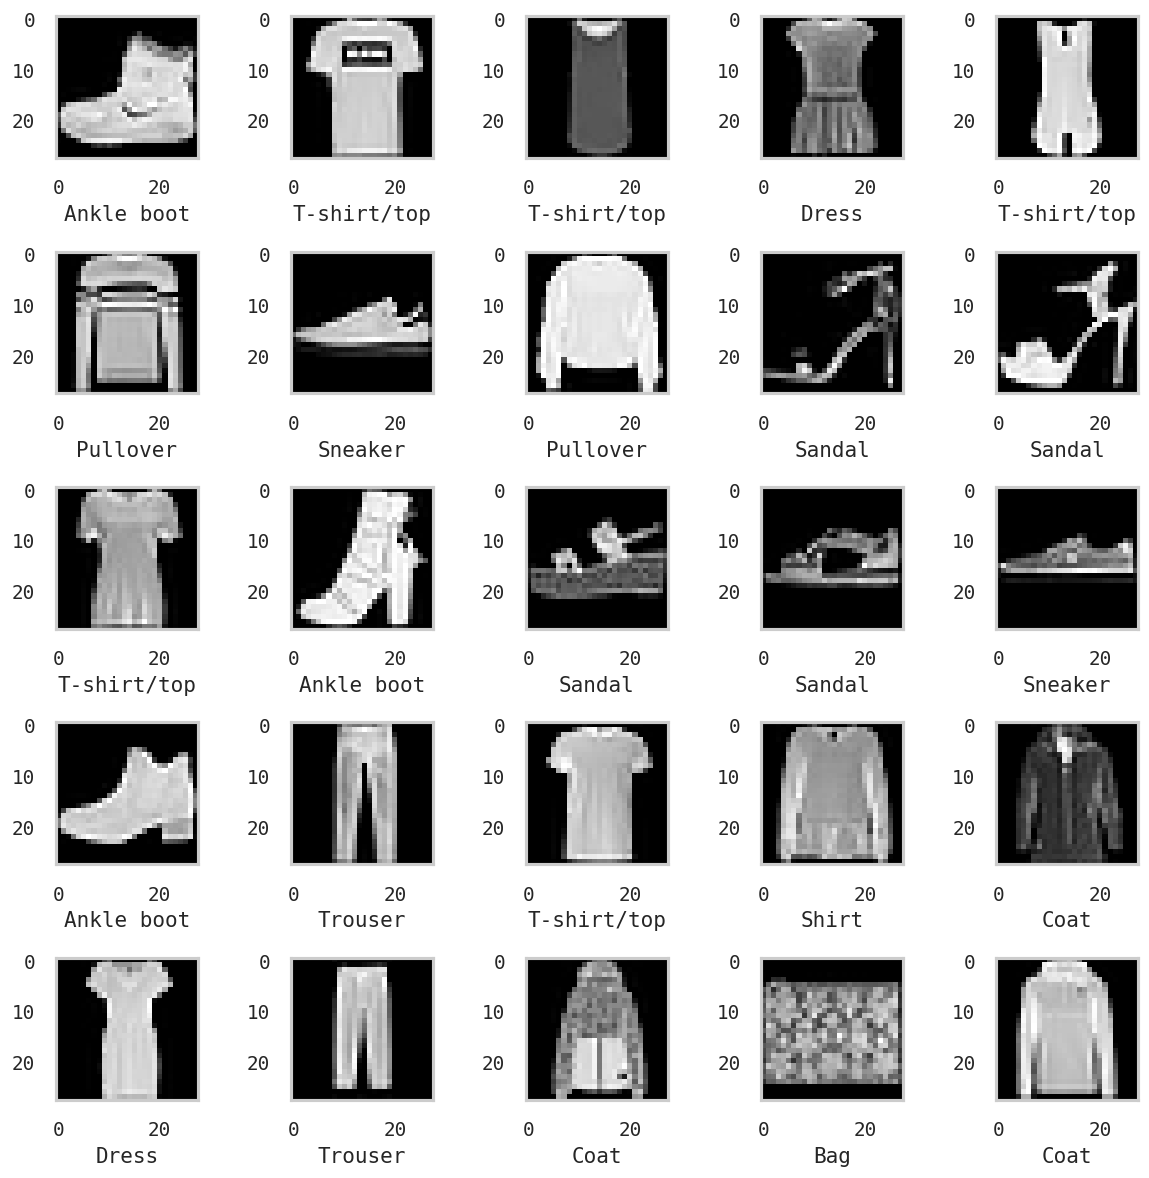

In [9]:
#visualizing few of the training images
plt.figure(figsize=(10,10),dpi=120)
sns.set(context='talk',style='whitegrid',font='monospace',font_scale=0.7)
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_img[i],cmap="binary_r")
    plt.xlabel(product_names[train_name[i]])
plt.tight_layout()

**Before putting the data for training and testing the sets must be normalized in a scale of 0 to 1 by Pixel Normilization** **method for optimum performance and even distribution of weights**

In [10]:
print('Stats of Training data\nMin= ',train_img.min(),'\nMax= ',train_img.max(),'\nMean= ',train_img.mean(),"\nSTD=",train_img.std())

Stats of Training data
Min=  0 
Max=  255 
Mean=  72.94035223214286 
STD= 90.02118235130519


In [11]:
print('Stats of Test data\nMin= ',test_img.min(),'\nMax= ',test_img.max(),'\nMean= ',test_img.mean(),"\nSTD=",test_img.std())

Stats of Test data
Min=  0 
Max=  255 
Mean=  73.14656658163265 
STD= 89.87325907809718


In [12]:
#Here it can be seen that the  pixel values are lying between 0 and 255 so normalizing the dataset by taking the max value
train=train_img/255.0
test=test_img/255.0

In [13]:
#rechecking the values
print('Stats of New Training data\nMin= ',train.min(),'\nMax= ',train.max(),'\nMean= ',train.mean(),"\nSTD=",train.std())
print('\nStats of New Test data\nMin= ',test.min(),'\nMax= ',test.max(),'\nMean= ',test.mean(),"\nSTD=",test.std())

Stats of New Training data
Min=  0.0 
Max=  1.0 
Mean=  0.2860405969887955 
STD= 0.35302424451492237

Stats of New Test data
Min=  0.0 
Max=  1.0 
Mean=  0.2868492807122849 
STD= 0.35244415324744005


In [14]:
#importing important libraries for training
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

Using TensorFlow backend.


In [15]:
#creating the network sequence
m= Sequential(name='Fashion')
m.add(Flatten(input_shape=(28,28)))
m.add(Dense(120, activation='relu',name='hidden_layer1'))
m.add(Dense(10, activation='softmax',name='output_layer'))
m.summary()

Model: "Fashion"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 120)               94200     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1210      
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


In [16]:
#compiling the model
#using Categorical Cross Entropy as loss function as it is  a categorical problem with more than 2 label
m.compile(loss="SparseCategoricalCrossentropy",optimizer='adam',metrics='accuracy')

In [17]:
analysis=m.fit(train,train_name,epochs=15,shuffle=True,validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5142 - accuracy: 0.8200 - val_loss: 0.4600 - val_accuracy: 0.8225
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3824 - accuracy: 0.8628 - val_loss: 0.3927 - val_accuracy: 0.8640
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3383 - accuracy: 0.8776 - val_loss: 0.3701 - val_accuracy: 0.8628
Epoch 4/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8837 - val_loss: 0.3406 - val_accuracy: 0.8780
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2973 - accuracy: 0.8917 - val_loss: 0.3500 - val_accuracy: 0.8780
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2826 - accuracy: 0.8957 - val_loss: 0.3289 - val_accuracy: 0.8798
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2705 - accuracy: 0.8988 - val_loss: 0.3141 - val_accuracy:

In [22]:
loss,accuracy=m.evaluate(test,test_name)

313/313 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8763


In [24]:
print("loss=",loss,'\nAccuracy=',accuracy*100)

loss= 0.3732035160064697 
Accuracy= 87.62999773025513


**here the model suffering from overfitting**